# MOVIE RATING PREDICTION

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Importing the movies dataset

In [2]:
input_file_path = r"C:\Users\DELL\Documents\movies.dat"

In [3]:
output_file_path = "movies.csv"

In [4]:
# Read the .dat file into a dataframe using a specific encoding
movies_data = pd.read_csv(input_file_path, encoding='latin1', sep='::', engine='python', header=None)

In [5]:
# Write the dataframe into a .csv file 
movies_data.to_csv(output_file_path, index=False)
movies_data.head(10)

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
# Giving names to the attributes(columns)
movies_data.columns = ['Movie_Id', 'Movie_Name', 'Genre']
movies_data.dropna(inplace=True)

In [7]:
movies_data.head(10)

,Movie_Id,Movie_Name,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [8]:
movies_data.tail(10)

,Movie_Id,Movie_Name,Genre
3873,3943,Bamboozled (2000),Comedy
3874,3944,Bootmen (2000),Comedy|Drama
3875,3945,Digimon: The Movie (2000),Adventure|Animation|Children's
3876,3946,Get Carter (2000),Action|Drama|Thriller
3877,3947,Get Carter (1971),Thriller
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [9]:
movies_data.shape

(3883, 3)

In [10]:
movies_data.describe()

,Movie_Id
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [11]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie_Id    3883 non-null   int64 
 1   Movie_Name  3883 non-null   object
 2   Genre       3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [12]:
# To check for null values
movies_data.isna().sum()

Movie_Id      0
Movie_Name    0
Genre         0
dtype: int64

This indicates that there are no missing values in the movies dataset.

## Importing the ratings dataset

In [13]:
input_file_path = r"C:\Users\DELL\Documents\ratings.dat"

In [14]:
output_file_path = "ratings.csv"

In [15]:
# Read the .dat file into a dataframe using a specific encoding
ratings_data = pd.read_csv(input_file_path, encoding='latin1', sep='::', engine='python', header=None)

In [16]:
# Write the dataframe into a .csv file 
ratings_data.to_csv(output_file_path, index=False)
ratings_data.head(10)

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [17]:
# Giving names to the attributes(columns)
ratings_data.columns = ['Id', 'Movie_Id', 'Rating', 'Timestamp']
ratings_data.dropna(inplace=True)

In [18]:
ratings_data.head(10)

,Id,Movie_Id,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [19]:
ratings_data.tail(10)

,Id,Movie_Id,Rating,Timestamp
1000199,6040,2022,5,956716207
1000200,6040,2028,5,956704519
1000201,6040,1080,4,957717322
1000202,6040,1089,4,956704996
1000203,6040,1090,3,956715518
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [20]:
ratings_data.shape

(1000209, 4)

In [21]:
ratings_data.describe()

,Id,Movie_Id,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [22]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   Id         1000209 non-null  int64
 1   Movie_Id   1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [23]:
# To check for null values
ratings_data.isna().sum()

Id           0
Movie_Id     0
Rating       0
Timestamp    0
dtype: int64

This indicates that there are no null values in the ratings dataset.

## Importing the users dataset

In [24]:
input_file_path = r"C:\Users\DELL\Documents\users.dat"

In [25]:
output_file_path = "users.csv"

In [26]:
# Read the .dat file into a dataframe using a specific encoding
users_data = pd.read_csv(input_file_path, encoding='latin1', sep='::', engine='python', header=None)

In [27]:
# Write the dataframe into a .csv file 
users_data.to_csv(output_file_path, index=False)
users_data.head(10)

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [28]:
# Giving names to the attributes(columns)
users_data.columns = ['User_Id', 'Gender', 'Age','Occupation', 'Zip_Code']
users_data.dropna(inplace=True)

In [29]:
users_data.head(10)

,User_Id,Gender,Age,Occupation,Zip_Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [30]:
users_data.tail(10)

,User_Id,Gender,Age,Occupation,Zip_Code
6030,6031,F,18,0,45123
6031,6032,M,45,7,55108
6032,6033,M,50,13,78232
6033,6034,M,25,14,94117
6034,6035,F,25,1,78734
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


In [31]:
users_data['Gender'].replace({'M':0, 'F':1}, inplace=True)
users_data

,User_Id,Gender,Age,Occupation,Zip_Code
0,1,1,1,10,48067
1,2,0,56,16,70072
2,3,0,25,15,55117
3,4,0,45,7,02460
4,5,0,25,20,55455
...,...,...,...,...,...
6035,6036,1,25,15,32603
6036,6037,1,45,1,76006
6037,6038,1,56,1,14706
6038,6039,1,45,0,01060


In [32]:
users_data.shape

(6040, 5)

In [33]:
users_data.describe()

,User_Id,Gender,Age,Occupation
count,6040.000000,6040.000000,6040.000000,6040.000000
mean,3020.500000,0.282947,30.639238,8.146854
std,1743.742145,0.450468,12.895962,6.329511
min,1.000000,0.000000,1.000000,0.000000
25%,1510.750000,0.000000,25.000000,3.000000
50%,3020.500000,0.000000,25.000000,7.000000
75%,4530.250000,1.000000,35.000000,14.000000
max,6040.000000,1.000000,56.000000,20.000000


In [34]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User_Id     6040 non-null   int64 
 1   Gender      6040 non-null   int64 
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip_Code    6040 non-null   object
dtypes: int64(4), object(1)
memory usage: 236.1+ KB


In [35]:
# To check for null values
users_data.isna().sum()

User_Id       0
Gender        0
Age           0
Occupation    0
Zip_Code      0
dtype: int64

This suggests that there are no missing values in the users dataset.

## Finding relation between datasets

In [36]:
# Distinct values of Movie_Id
unique_counts = ratings_data['Movie_Id'].nunique()
print('Movie_Id:', unique_counts)

Movie_Id: 3706


There are 3706 distinct Movie Ids.

In [37]:
# Min value of Movie_Id
min = ratings_data['Movie_Id'].min()
print('Movie_Id:', min)

Movie_Id: 1


In [38]:
# Max value of Movie_Id
max = ratings_data['Movie_Id'].max()
print('Movie_Id:', max)

Movie_Id: 3952


In [39]:
# Distinct values of Id
unique_counts_id = ratings_data['Id'].nunique()
print('Id:', unique_counts_id)

Id: 6040


There are 6040 unique Ids.

In [40]:
# Min value of Id
min_id = ratings_data['Id'].min()
print('Id:', min_id)

Id: 1


In [41]:
# Max value of Id
max_id = ratings_data['Id'].max()
print('Id:', max_id)

Id: 6040


## Merging of datasets

In [42]:
# Merge 'movies', 'ratings' and 'users' dataframe on the basis of common attributes
merged_data = pd.merge(ratings_data, users_data, left_on='Id', right_on='User_Id')
merged_data = pd.merge(merged_data, movies_data, on='Movie_Id')

In [43]:
merged_data.head(10)

,Id,Movie_Id,Rating,Timestamp,User_Id,Gender,Age,Occupation,Zip_Code,Movie_Name,Genre
0,1,1193,5,978300760,1,1,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,2,0,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,12,0,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,15,0,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,17,0,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,18,1,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,19,0,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,24,1,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,28,1,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,33,0,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [44]:
merged_data.tail(10)

,Id,Movie_Id,Rating,Timestamp,User_Id,Gender,Age,Occupation,Zip_Code,Movie_Name,Genre
1000199,5334,3382,5,960796159,5334,1,56,13,46140,Song of Freedom (1936),Drama
1000200,5420,1843,3,960156505,5420,1,1,19,14850,Slappy and the Stinkers (1998),Children's|Comedy
1000201,5433,286,3,960240881,5433,1,35,17,45014,Nemesis 2: Nebula (1995),Action|Sci-Fi|Thriller
1000202,5494,3530,4,959816296,5494,1,35,17,94306,Smoking/No Smoking (1993),Comedy
1000203,5556,2198,3,959445515,5556,0,45,6,92103,Modulations (1998),Documentary
1000204,5949,2198,5,958846401,5949,0,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,5675,0,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,5780,0,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,5851,1,18,20,55410,One Little Indian (1973),Comedy|Drama|Western
1000208,5938,2909,4,957273353,5938,0,25,1,35401,"Five Wives, Three Secretaries and Me (1998)",Documentary


In [45]:
merged_data.shape

(1000209, 11)

In [46]:
merged_data.describe()

,Id,Movie_Id,Rating,Timestamp,User_Id,Gender,Age,Occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08,3.024512e+03,2.463885e-01,2.973831e+01,8.036138e+00
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07,1.728413e+03,4.309076e-01,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,1.506000e+03,0.000000e+00,2.500000e+01,2.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,3.070000e+03,0.000000e+00,2.500000e+01,7.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,4.476000e+03,0.000000e+00,3.500000e+01,1.400000e+01
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09,6.040000e+03,1.000000e+00,5.600000e+01,2.000000e+01


In [47]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Id          1000209 non-null  int64 
 1   Movie_Id    1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Timestamp   1000209 non-null  int64 
 4   User_Id     1000209 non-null  int64 
 5   Gender      1000209 non-null  int64 
 6   Age         1000209 non-null  int64 
 7   Occupation  1000209 non-null  int64 
 8   Zip_Code    1000209 non-null  object
 9   Movie_Name  1000209 non-null  object
 10  Genre       1000209 non-null  object
dtypes: int64(8), object(3)
memory usage: 91.6+ MB


In [48]:
# To check for null values
merged_data.isnull().sum()

Id            0
Movie_Id      0
Rating        0
Timestamp     0
User_Id       0
Gender        0
Age           0
Occupation    0
Zip_Code      0
Movie_Name    0
Genre         0
dtype: int64

This indicates that there are no null values in the merged dataset.

In [49]:
# To calculate count of users using Movie_Id and Rating
user_count = merged_data.groupby(['Movie_Id', 'Rating']).size().reset_index(name='UserCount')

In [50]:
user_count

,Movie_Id,Rating,UserCount
0,1,1,16
1,1,2,61
2,1,3,345
3,1,4,835
4,1,5,820
...,...,...,...
16907,3952,1,9
16908,3952,2,26
16909,3952,3,89
16910,3952,4,181


In [51]:
# To get movies which has more ratings than 100
data = user_count[user_count['UserCount'] >= 100]

In [52]:
data = pd.merge(data, merged_data[['Movie_Id', 'Rating', 'Genre']])
data

,Movie_Id,Rating,UserCount,Genre
0,1,3,345,Animation|Children's|Comedy
1,1,3,345,Animation|Children's|Comedy
2,1,3,345,Animation|Children's|Comedy
3,1,3,345,Animation|Children's|Comedy
4,1,3,345,Animation|Children's|Comedy
...,...,...,...,...
674616,3952,4,181,Drama|Thriller
674617,3952,4,181,Drama|Thriller
674618,3952,4,181,Drama|Thriller
674619,3952,4,181,Drama|Thriller


In [53]:
data.shape

(674621, 4)

In [54]:
data1 = pd.concat([movies_data, ratings_data, users_data], axis=1)

In [55]:
data1.head(10)

,Movie_Id,Movie_Name,Genre,Id,Movie_Id,Rating,Timestamp,User_Id,Gender,Age,Occupation,Zip_Code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,1.0,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,0.0,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,0.0,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,0.0,45.0,7.0,02460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,0.0,25.0,20.0,55455
5,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,1.0,50.0,9.0,55117
6,7.0,Sabrina (1995),Comedy|Romance,1,1287,5,978302039,7.0,0.0,35.0,1.0,06810
7,8.0,Tom and Huck (1995),Adventure|Children's,1,2804,5,978300719,8.0,0.0,25.0,12.0,11413
8,9.0,Sudden Death (1995),Action,1,594,4,978302268,9.0,0.0,25.0,17.0,61614
9,10.0,GoldenEye (1995),Action|Adventure|Thriller,1,919,4,978301368,10.0,1.0,35.0,1.0,95370


In [56]:
data1.tail(10)

,Movie_Id,Movie_Name,Genre,Id,Movie_Id,Rating,Timestamp,User_Id,Gender,Age,Occupation,Zip_Code
1000199,NaN,NaN,NaN,6040,2022,5,956716207,NaN,NaN,NaN,NaN,NaN
1000200,NaN,NaN,NaN,6040,2028,5,956704519,NaN,NaN,NaN,NaN,NaN
1000201,NaN,NaN,NaN,6040,1080,4,957717322,NaN,NaN,NaN,NaN,NaN
1000202,NaN,NaN,NaN,6040,1089,4,956704996,NaN,NaN,NaN,NaN,NaN
1000203,NaN,NaN,NaN,6040,1090,3,956715518,NaN,NaN,NaN,NaN,NaN
1000204,NaN,NaN,NaN,6040,1091,1,956716541,NaN,NaN,NaN,NaN,NaN
1000205,NaN,NaN,NaN,6040,1094,5,956704887,NaN,NaN,NaN,NaN,NaN
1000206,NaN,NaN,NaN,6040,562,5,956704746,NaN,NaN,NaN,NaN,NaN
1000207,NaN,NaN,NaN,6040,1096,4,956715648,NaN,NaN,NaN,NaN,NaN
1000208,NaN,NaN,NaN,6040,1097,4,956715569,NaN,NaN,NaN,NaN,NaN


In [57]:
data1.describe()

,Movie_Id,Id,Movie_Id,Rating,Timestamp,User_Id,Gender,Age,Occupation
count,3883.000000,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,6040.000000,6040.000000,6040.000000,6040.000000
mean,1986.049446,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08,3020.500000,0.282947,30.639238,8.146854
std,1146.778349,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07,1743.742145,0.450468,12.895962,6.329511
min,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000,0.000000,1.000000,0.000000
25%,982.500000,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,1510.750000,0.000000,25.000000,3.000000
50%,2010.000000,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,3020.500000,0.000000,25.000000,7.000000
75%,2980.500000,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,4530.250000,1.000000,35.000000,14.000000
max,3952.000000,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09,6040.000000,1.000000,56.000000,20.000000


In [58]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Movie_Id    3883 non-null     float64
 1   Movie_Name  3883 non-null     object 
 2   Genre       3883 non-null     object 
 3   Id          1000209 non-null  int64  
 4   Movie_Id    1000209 non-null  int64  
 5   Rating      1000209 non-null  int64  
 6   Timestamp   1000209 non-null  int64  
 7   User_Id     6040 non-null     float64
 8   Gender      6040 non-null     float64
 9   Age         6040 non-null     float64
 10  Occupation  6040 non-null     float64
 11  Zip_Code    6040 non-null     object 
dtypes: float64(5), int64(4), object(3)
memory usage: 91.6+ MB


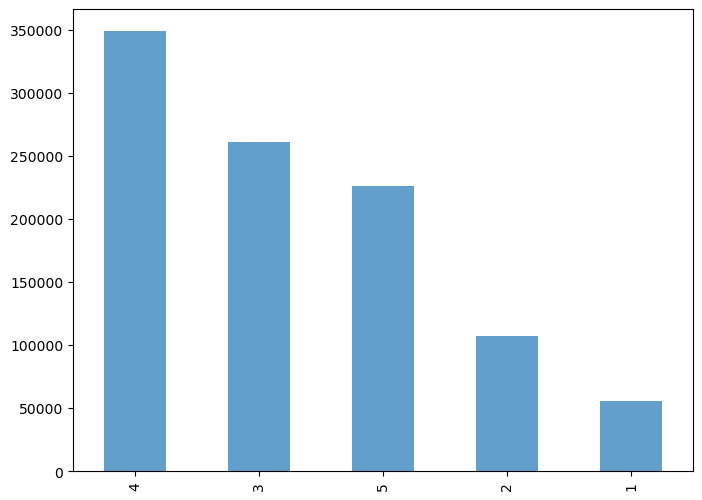

In [59]:
data1['Rating'].value_counts().plot(kind='bar', alpha=0.7, figsize=(8,6))
plt.show()

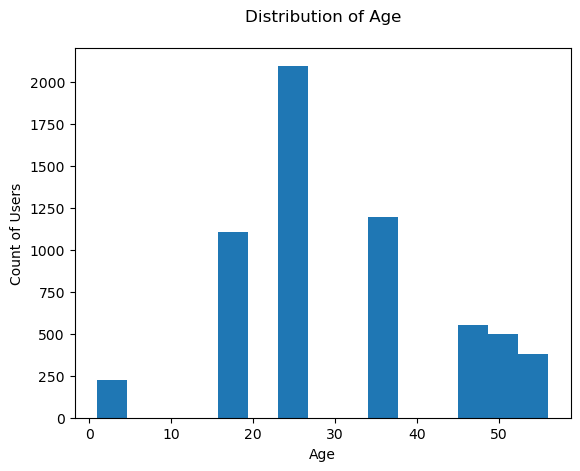

In [60]:
data1.Age.plot.hist(bins=15)
plt.title('Distribution of Age', y=1.05)
plt.xlabel('Age')
plt.ylabel('Count of Users')
plt.show()

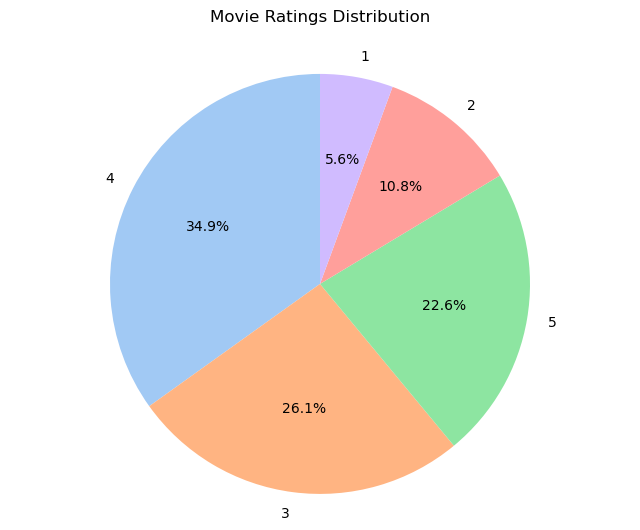

In [61]:
# Count of occurences of each rating
rating_count = ratings_data['Rating'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(rating_count, labels=rating_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Movie Ratings Distribution', y=1.05)
plt.axis('equal')
plt.show()

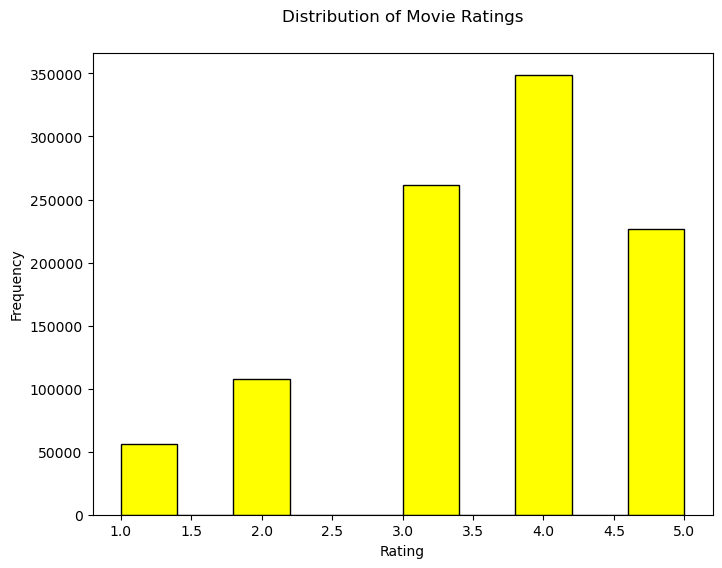

In [62]:
plt.figure(figsize=(8,6))
plt.hist(ratings_data['Rating'], bins=10, color='yellow', edgecolor='black')
plt.title('Distribution of Movie Ratings', y=1.05)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## Building the Model

In [63]:
df = data
df.dropna(inplace=True)

In [64]:
df

,Movie_Id,Rating,UserCount,Genre
0,1,3,345,Animation|Children's|Comedy
1,1,3,345,Animation|Children's|Comedy
2,1,3,345,Animation|Children's|Comedy
3,1,3,345,Animation|Children's|Comedy
4,1,3,345,Animation|Children's|Comedy
...,...,...,...,...
674616,3952,4,181,Drama|Thriller
674617,3952,4,181,Drama|Thriller
674618,3952,4,181,Drama|Thriller
674619,3952,4,181,Drama|Thriller


### Splitting the data into Training set and Testing set

In [65]:
X = df.drop(['Genre'], axis=1)
y = df['Rating']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [68]:
print(X.shape, X_train.shape, X_test.shape)

(674621, 3) (472234, 3) (202387, 3)


## Training the Model

### Using Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [71]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [72]:
# Mean Squared Error
y_predict = logmodel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.808337492032591


In [73]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 0.8990759100501976


In [74]:
# Training Accuracy
acc = round(logmodel.score(X_train, y_train)*100, 2)
print(acc)

49.91


In [75]:
# Testing Accuracy
acc = round(logmodel.score(X_test, y_test)*100, 2)
print(acc)

49.72


In [76]:
predictions = logmodel.predict(X_test)
print('Accuracy:', accuracy_score(predictions, y_test))

Accuracy: 0.49717620202878643


    Mean Squared Error
    0.808337492032591
    Root Mean Squared Error
    0.8990759100501976
    Accuracy
    0.49717620202878643